<a href="https://colab.research.google.com/github/Hyuk-Jung-Newbie/individual-repoting_JH/blob/main/%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C_%ED%95%9C%EC%8B%9D%EB%B6%84%EB%A5%98_%EC%A0%95%ED%98%81_v0_35_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd/content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류

/content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류


In [106]:
pip install imageio

In [107]:
import tensorflow as tf
import numpy as np
from skimage import io
import cv2
import os
import PIL
import tensorflow_datasets as tfds
from google.colab.patches import cv2_imshow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from google.colab import drive
from imageio import imread

In [38]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류


In [75]:
# Training set folder 
paths = {"가지볶음","간장게장","갈비구이","갈비찜","갈비탕","갈치구이","갈치조림","감자전","감자조림","감자채볶음",
         "감자탕","갓김치","건새우볶음","경단","계란국","계란말이","계란찜","계란후라이","고등어구이",
         "고등어조림","고사리나물","고추장진미채볶음","고추튀김","곰탕_설렁탕","곱창구이","곱창전골","과메기",
         "김밥","김치볶음밥","김치전","김치찌개","김치찜","깍두기","깻잎장아찌","꼬막찜","꽁치조림",
         "꽈리고추무침","꿀떡","나박김치","누룽지","닭갈비","닭계장","닭볶음탕","더덕구이","도라지무침",
         "도토리묵","동그랑땡","동태찌개","된장찌개","두부김치","두부조림","땅콩조림","떡갈비","떡국_만두국",
         "떡꼬치","떡볶이","라면","라볶이","막국수","만두","매운탕","멍게","메추리알장조림","멸치볶음","무국",
         "무생채","물냉면","미역국","미역줄기볶음","배추김치","백김치","부추김치","북엇국","불고기","비빔냉면",
         "비빔밥","산낙지","삼겹살","삼계탕","새우볶음밥","새우튀김","생선전","소세지볶음","송편","수육","수정과",
         "수제비","숙주나물","순대","순두부찌개","시금치나물","시래기국","식혜","쌈","알밥","애호박볶음","약과",
         "약식","양념게장","양념치킨","어묵볶음","연근조림","열무국수","열무김치","오이소박이","오징어채볶음","오징어튀김",
         "우엉조림","유부초밥","육개장","잔치국수","잡곡밥","잡채","장","장어구이","장조림",
         "전복죽","젓갈","제육볶음","조개구이","조기구이","족발","주꾸미볶음","주먹밥","짜장면","짬뽕","쫄면",
         "찜닭","총각김치","추어탕","칼국수","코다리조림","콩국수","콩나물국","콩나물무침","콩자반","파김치",
         "파전","편육","피자","한과","해물찜","호박전","호박죽","홍어무침","황태구이","회무침","후라이드치킨",
         "훈제오리"}
# The reshape size
imgsize = [64, 64]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(paths):
    print (" [%d/%d] %s/%s" % (i, len(paths), cwd, path)) 

print ("Data will be saved to %s" 
       % (cwd + '/data/' + data_name + '.npz'))

Your images should be at
 [0/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/제육볶음
 [1/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/간장게장
 [2/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/잔치국수
 [3/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/더덕구이
 [4/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/미역줄기볶음
 [5/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/꿀떡
 [6/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/순대
 [7/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/약식
 [8/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/감자조림
 [9/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/김밥
 [10/149] /content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/콩자반
 [11/149] /co

In [76]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

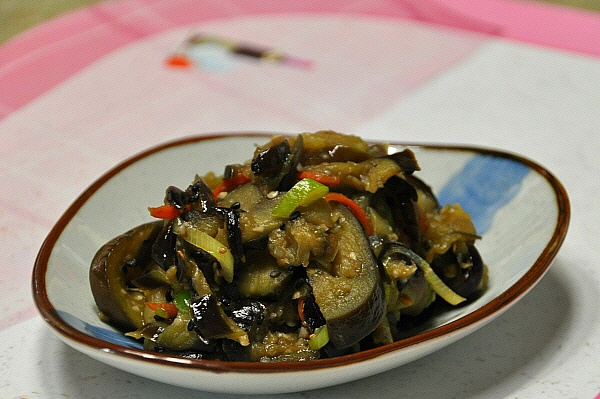

(399, 600, 3)


In [81]:
# 샘플 확인
img = cv2.imread('/content/drive/MyDrive/AI Con 교육과정_21/개인과제_한식 이미지 분류/가지볶음/Img_040_0000.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)
print(img.shape)

AttributeError: ignored

In [117]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        
        ## open cv 이용
        currimg  = cv2.imread(fullpath, cv2.IMREAD_GRAYSCALE)
        currimg_small = cv2.resize(currimg, (0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
        imgyvec   = np.reshape(currimg, (1, -1))
        # Save 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = imgyvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, imgyvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("Total %d images loaded." % (imgcnt))

ValueError: ignored

In [ ]:
##코드 변경한 부분

## Convert to grayscale  - 삭제
         #if use_gray:
        #   grayimg  = rgb2gray(currimg)
        #else:
        #   grayimg  = currimg
        ## Reshape - open cv로 재작성
        # graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255. >> 어떻게 opencv로 하는지 모르겠음
        # grayvec   = np.reshape(graysmall, (1, -1))

DIVIDE TOTAL DATA INTO TRAINING AND TEST SET

In [113]:
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(3*imgcnt/5)]
testidx    = randidx[int(3*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (0, 120000)
Shape of 'trainlabel' is (0, 149)
Shape of 'testimg' is (1, 120000)
Shape of 'testlabel' is (1, 149)


SAVE TO NPZ

In [114]:
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel, testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print ("Saved to %s" % (savepath))

Saved to /content/drive/My Drive/AI Con 교육과정_21/개인과제_한식 이미지 분류/data/custom_data.npz


LOAD TO CHECK!

In [115]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath,allow_pickle=True) ##allow_pickle = true 추가
1
# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

0 train images loaded
1 test images loaded
Loaded from to /content/drive/My Drive/AI Con 교육과정_21/개인과제_한식 이미지 분류/data/custom_data.npz


PLOT RANDOMLY SELECTED TRAIN IMAGES

In [96]:
print(trainimg_loaded.shape)

(79958, 1)


In [116]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

ValueError: ignored

PLOT RANDOMLY SELECTED TEST IMAGES

In [ ]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

error: ignored

In [ ]:
# 애로 사항
# 1) 확보한 데이터 셋에 YOLO를 어떻게 적용할 수 있나?
# 2) 적용한다고 했을 때, 폴더명을 라벨 및 region 명으로 어떻게 활용할 수 있는가?
# 3) 현재 폴더구조로 구성된 데이터 셋을 바꿔야 하는 것인가?